In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Préparation examen/Prediction/Input/Instagram_Analytics/Instagram_Analytics.csv')
df

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,IG0029995,2024-12-18 09:25:22.954916,Video,46046,8354,3847,11095,597992,820688,1254,18,124,Reels Feed,8.45,Travel
29995,IG0029996,2025-05-05 09:25:22.954916,Carousel,67711,3266,458,12380,1908094,2218288,1427,4,310,Hashtags,3.78,Beauty
29996,IG0029997,2025-05-26 09:25:22.954916,Photo,52326,7328,3687,7619,1984066,2447893,713,4,223,Explore,2.90,Photography
29997,IG0029998,2025-08-02 09:25:22.954916,Carousel,158113,5890,2573,6329,1984709,2001092,1341,22,978,Explore,8.64,Technology


In [4]:
df.shape


(29999, 15)

# Task
```python
# Préparation des Données et Ingénierie des Caractéristiques

# 1. Convertir la colonne 'upload_date' en format datetime et extraire des caractéristiques temporelles
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['upload_month'] = df['upload_date'].dt.month
df['upload_day_of_week'] = df['upload_date'].dt.dayofweek # Lundi=0, Dimanche=6
df['upload_hour'] = df['upload_date'].dt.hour
df['upload_year'] = df['upload_date'].dt.year

# 2. Encoder les variables catégorielles à l'aide de l'encodage One-Hot
categorical_cols = ['media_type', 'traffic_source', 'content_category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True pour éviter la multicolinéarité

# Afficher les premières lignes du DataFrame modifié pour vérifier les changements
print("DataFrame après ingénierie des caractéristiques et encodage One-Hot :")
print(df.head())

# Afficher les informations du DataFrame pour vérifier les types de données et les colonnes
print("\nInformations du DataFrame après transformations :")
print(df.info())

# 3. Gérer les valeurs manquantes si elles existent (vérification)
print("\nValeurs manquantes après transformations :")
print(df.isnull().sum())

# Supprimer les colonnes qui ne sont plus nécessaires pour l'entraînement (par exemple, 'post_id' et 'upload_date' originale)
df_processed = df.drop(columns=['post_id', 'upload_date'])

print("\nDataFrame final après suppression des colonnes non pertinentes :")
print(df_processed.head())
```

## Préparation des Données et Ingénierie des Caractéristiques

### Subtask:
Convertir la colonne 'upload_date' en format datetime et extraire des caractéristiques temporelles pertinentes (par exemple, mois, jour de la semaine). Encoder les variables catégorielles ('media_type', 'traffic_source', 'content_category') à l'aide de l'encodage One-Hot. La variable cible sera 'engagement_rate'. Gérer les valeurs manquantes si elles existent.


**Reasoning**:
The first step is to convert the 'upload_date' column to datetime objects and extract relevant temporal features like month, day of the week, hour, and year, as specified in the instructions. This is a crucial step for preparing the data for further analysis and modeling.



In [5]:
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['upload_month'] = df['upload_date'].dt.month
df['upload_day_of_week'] = df['upload_date'].dt.dayofweek
df['upload_hour'] = df['upload_date'].dt.hour
df['upload_year'] = df['upload_date'].dt.year
print("Temporal features extracted and added to the DataFrame.")

Temporal features extracted and added to the DataFrame.


**Reasoning**:
The next step is to apply One-Hot Encoding to the specified categorical columns ('media_type', 'traffic_source', 'content_category') to convert them into a numerical format suitable for modeling, while dropping the first category to prevent multicollinearity as per the instructions.



In [6]:
categorical_cols = ['media_type', 'traffic_source', 'content_category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical variables have been One-Hot Encoded.")

Categorical variables have been One-Hot Encoded.


**Reasoning**:
After extracting temporal features and applying one-hot encoding, it's important to display the head of the DataFrame, its information, and any missing values to verify the transformations and understand the current state of the data before proceeding with further processing.



In [7]:
print("\nDataFrame after feature engineering and One-Hot encoding:")
print(df.head())

print("\nDataFrame Information after transformations:")
df.info()

print("\nMissing values after transformations:")
print(df.isnull().sum())


DataFrame after feature engineering and One-Hot encoding:
     post_id                upload_date   likes  comments  shares  saves  \
0  IG0000001 2024-11-30 09:25:22.954916   31627      7559    4530   6393   
1  IG0000002 2025-08-15 09:25:22.954916   63206      3490    1680   6809   
2  IG0000003 2025-09-11 09:25:22.954916   94373      3727    1761   8367   
3  IG0000004 2025-09-18 09:25:22.954916  172053      7222    2875   9290   
4  IG0000005 2025-03-21 09:25:22.954916   99646      2703    4444   9746   

     reach  impressions  caption_length  hashtags_count  ...  \
0   615036      1007750            1340               3  ...   
1  1237071      1345900            1351              20  ...   
2  1127470      1305369             242              24  ...   
3   764030       897874             446              11  ...   
4     7004       495406            1905               8  ...   

   traffic_source_Reels Feed  content_category_Comedy  \
0                      False              

**Reasoning**:
The next step is to create a new DataFrame `df_processed` by dropping the `post_id` and the original `upload_date` columns from the DataFrame, as these columns are no longer needed for model training after feature engineering and the extraction of temporal features, as specified in the instructions.



In [8]:
df_processed = df.drop(columns=['post_id', 'upload_date'])
print("Columns 'post_id' and 'upload_date' have been dropped, and df_processed created.")

Columns 'post_id' and 'upload_date' have been dropped, and df_processed created.


**Reasoning**:
To complete the subtask, the final step is to display the first five rows of the newly created `df_processed` DataFrame to confirm that the irrelevant columns have been successfully removed, as specified in the instructions.



In [9]:
print("\nDataFrame final after dropping non-relevant columns:")
print(df_processed.head())


DataFrame final after dropping non-relevant columns:
    likes  comments  shares  saves    reach  impressions  caption_length  \
0   31627      7559    4530   6393   615036      1007750            1340   
1   63206      3490    1680   6809  1237071      1345900            1351   
2   94373      3727    1761   8367  1127470      1305369             242   
3  172053      7222    2875   9290   764030       897874             446   
4   99646      2703    4444   9746     7004       495406            1905   

   hashtags_count  followers_gained  engagement_rate  ...  \
0               3               899             4.97  ...   
1              20               805             5.59  ...   
2              24               758             8.29  ...   
3              11               402            21.32  ...   
4               8               155            23.52  ...   

   traffic_source_Reels Feed  content_category_Comedy  \
0                      False                    False   
1       

## Division des Données

### Subtask:
Diviser le jeu de données en ensembles d'entraînement (training set) et de test (test set) pour évaluer l'efficacité de chaque modèle de régression.


**Reasoning**:
The first instruction is to identify the target variable 'engagement_rate' and the features from the df_processed DataFrame. The target will be stored in `y` and the features in `X`.



In [10]:
y = df_processed['engagement_rate']
X = df_processed.drop(columns=['engagement_rate'])
print("Target variable 'y' and features 'X' have been defined.")

Target variable 'y' and features 'X' have been defined.


**Reasoning**:
Now that the target and features are defined, the next step is to import the `train_test_split` function from `sklearn.model_selection` to prepare for splitting the data.



In [11]:
from sklearn.model_selection import train_test_split
print("'train_test_split' function imported.")

'train_test_split' function imported.


**Reasoning**:
The next step is to split the `X` and `y` data into training and testing sets using `train_test_split`, as specified, with a test size of 0.2 and a random state for reproducibility.



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and test sets.")

Data split into training and test sets.


## Régression Linéaire

### Subtask:
Entraîner un modèle de Régression Linéaire sur les données d'entraînement. Évaluer ses performances à l'aide de métriques clés comme le R-carré, l'Erreur Quadratique Moyenne (MSE) et l'Erreur Quadratique Moyenne de la Racine (RMSE). Visualiser les valeurs réelles par rapport aux valeurs prédites pour ce modèle.


**Reasoning**:
The first instruction is to import the `LinearRegression` class and evaluation metrics (`mean_squared_error`, `r2_score`) from `sklearn` to prepare for model training and evaluation.



In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("LinearRegression and evaluation metrics imported.")

LinearRegression and evaluation metrics imported.


**Reasoning**:
The next step is to initialize the Linear Regression model and train it using the training data (`X_train`, `y_train`), as specified in the instructions.



In [14]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print("Linear Regression model initialized and trained.")

Linear Regression model initialized and trained.


**Reasoning**:
The next step is to make predictions on the test set (`X_test`) using the trained Linear Regression model, as specified in the instructions.



In [15]:
y_pred_lr = model_lr.predict(X_test)
print("Predictions on the test set made.")

Predictions on the test set made.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) using the actual test values (`y_test`) and the predicted values (`y_pred_lr`), as specified in the instructions. This will provide key performance metrics for the Linear Regression model.



In [16]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - R-squared: {r2_lr:.2f}")
print(f"Linear Regression - MSE: {mse_lr:.2f}")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}")

Linear Regression - R-squared: 0.09
Linear Regression - MSE: 2238.52
Linear Regression - RMSE: 47.31


**Reasoning**:
The final step of the subtask is to visualize the actual values (`y_test`) against the predicted values (`y_pred_lr`) using a scatter plot. This visualization will include a diagonal line representing perfect predictions, along with appropriate titles and axis labels to assess the model's fit, as specified in the instructions.



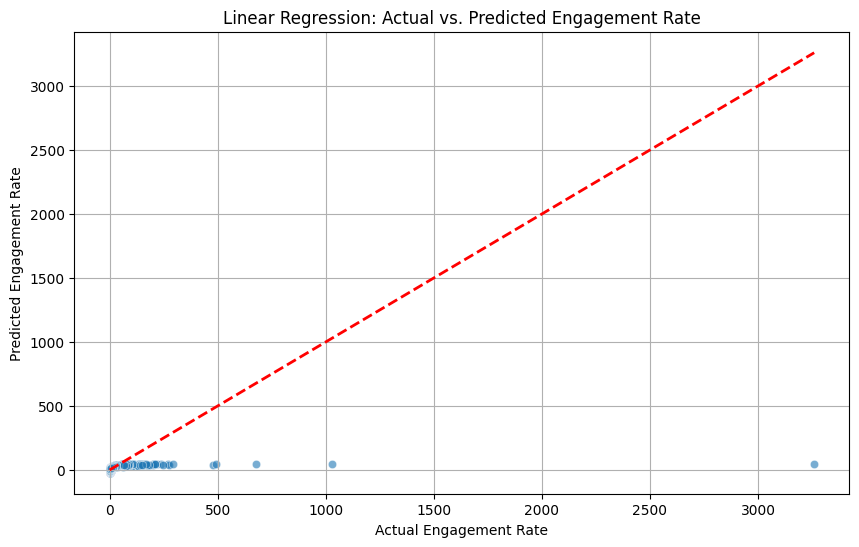

Scatter plot of actual vs. predicted values for Linear Regression displayed.


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Engagement Rate")
plt.ylabel("Predicted Engagement Rate")
plt.title("Linear Regression: Actual vs. Predicted Engagement Rate")
plt.grid(True)
plt.show()
print("Scatter plot of actual vs. predicted values for Linear Regression displayed.")

## Régression Polynomiale

### Subtask:
Créer des caractéristiques polynomiales à partir des features existantes. Entraîner un modèle de Régression Linéaire avec ces nouvelles caractéristiques. Évaluer ses performances et visualiser les valeurs réelles par rapport aux valeurs prédites.


**Reasoning**:
The first step is to import the `PolynomialFeatures` class and create polynomial features from the existing `X_train` and `X_test` data as specified in the instructions. This will transform the feature space for polynomial regression.



In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print("Polynomial features created for training and test sets.")

Polynomial features created for training and test sets.


**Reasoning**:
The next step is to initialize the Linear Regression model and train it using the polynomial features created for the training data (`X_train_poly`) and the target variable (`y_train`), as specified in the instructions.



In [19]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
print("Linear Regression model trained on polynomial features.")

Linear Regression model trained on polynomial features.


**Reasoning**:
The next step is to use the trained polynomial regression model to make predictions on the polynomial features of the test set (`X_test_poly`), as specified in the instructions.



In [20]:
y_pred_poly = model_poly.predict(X_test_poly)
print("Predictions on the polynomial test set made.")

Predictions on the polynomial test set made.


**Reasoning**:
Now that predictions have been made with the polynomial regression model, the next step is to calculate the R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate its performance, as specified in the instructions. These metrics will be printed, formatted to two decimal places.



In [21]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - R-squared: {r2_poly:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}")
print(f"Polynomial Regression - RMSE: {rmse_poly:.2f}")

Polynomial Regression - R-squared: 0.17
Polynomial Regression - MSE: 2061.97
Polynomial Regression - RMSE: 45.41


**Reasoning**:
The final step of the subtask is to visualize the actual values (`y_test`) against the predicted values (`y_pred_poly`) using a scatter plot. This visualization will include a diagonal line representing perfect predictions, along with appropriate titles and axis labels to assess the model's fit, as specified in the instructions.



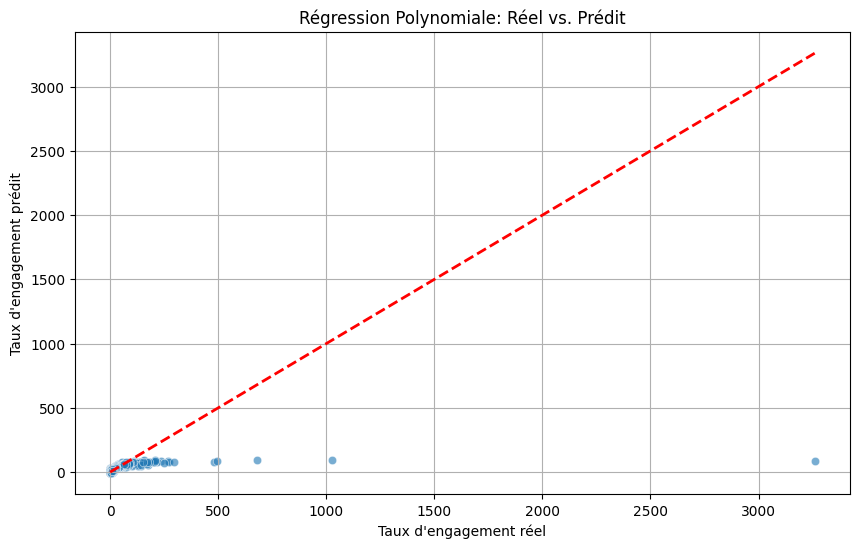

Scatter plot of actual vs. predicted values for Polynomial Regression displayed.


In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Taux d'engagement réel")
plt.ylabel("Taux d'engagement prédit")
plt.title("Régression Polynomiale: Réel vs. Prédit")
plt.grid(True)
plt.show()
print("Scatter plot of actual vs. predicted values for Polynomial Regression displayed.")

## Régression par Arbres de Décision

### Subtask:
Entraîner un modèle de Régression par Arbres de Décision. Évaluer ses performances avec les mêmes métriques que précédemment. Visualiser les valeurs réelles par rapport aux valeurs prédites.


**Reasoning**:
The first step is to import the `DecisionTreeRegressor` class from `sklearn.tree` to prepare for training the Decision Tree Regression model, as specified in the instructions.



In [23]:
from sklearn.tree import DecisionTreeRegressor
print("DecisionTreeRegressor imported.")

DecisionTreeRegressor imported.


**Reasoning**:
The next step is to initialize the Decision Tree Regressor model and train it using the training data (`X_train`, `y_train`), as specified in the instructions.



In [24]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
print("Decision Tree Regressor model initialized and trained.")

Decision Tree Regressor model initialized and trained.


**Reasoning**:
The next step is to make predictions on the test set (`X_test`) using the trained Decision Tree Regressor model, as specified in the instructions, and store them in `y_pred_dt`.



In [25]:
y_pred_dt = model_dt.predict(X_test)
print("Predictions on the test set made for Decision Tree Regressor.")

Predictions on the test set made for Decision Tree Regressor.


**Reasoning**:
Now that predictions have been made, the next step is to calculate the R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Decision Tree Regressor model, using the actual test values (`y_test`) and the predicted values (`y_pred_dt`), as specified in the instructions. These metrics will be printed, formatted to two decimal places.



In [26]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - R-squared: {r2_dt:.2f}")
print(f"Decision Tree Regression - MSE: {mse_dt:.2f}")
print(f"Decision Tree Regression - RMSE: {rmse_dt:.2f}")

Decision Tree Regression - R-squared: 0.71
Decision Tree Regression - MSE: 708.15
Decision Tree Regression - RMSE: 26.61


**Reasoning**:
The final step of the subtask is to visualize the actual values (`y_test`) against the predicted values (`y_pred_dt`) using a scatter plot. This visualization will include a diagonal line representing perfect predictions, along with appropriate titles and axis labels to assess the model's fit, as specified in the instructions.



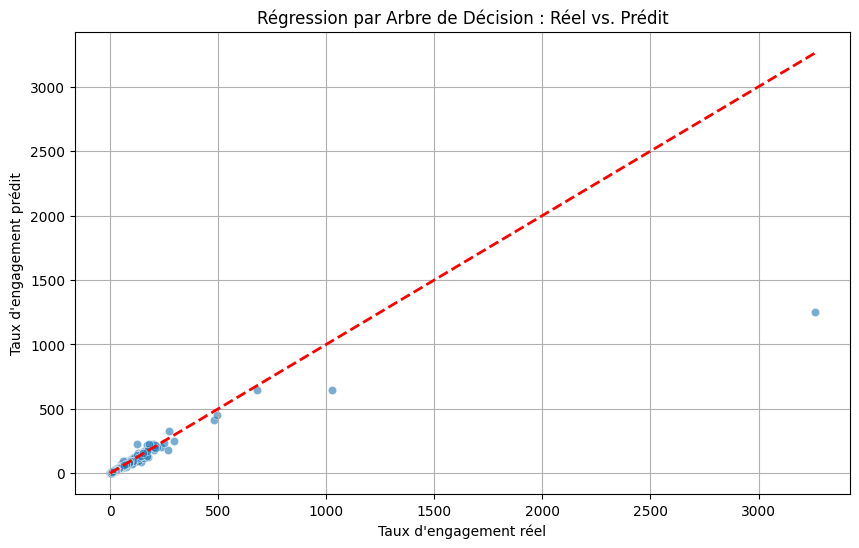

Scatter plot of actual vs. predicted values for Decision Tree Regression displayed.


In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Taux d'engagement réel")
plt.ylabel("Taux d'engagement prédit")
plt.title("Régression par Arbre de Décision : Réel vs. Prédit")
plt.grid(True)
plt.show()
print("Scatter plot of actual vs. predicted values for Decision Tree Regression displayed.")

## Régression par Forêts Aléatoires

### Subtask:
Entraîner un modèle de Régression par Forêts Aléatoires. Évaluer ses performances et visualiser les valeurs réelles par rapport aux valeurs prédites.


**Reasoning**:
The first step is to import the `RandomForestRegressor` class from `sklearn.ensemble` to prepare for training the Random Forest Regression model, as specified in the instructions.



In [28]:
from sklearn.ensemble import RandomForestRegressor
print("RandomForestRegressor imported.")

RandomForestRegressor imported.


**Reasoning**:
The next step is to initialize the `RandomForestRegressor` model with `random_state=42` and train it using the training data (`X_train`, `y_train`), as specified in the instructions.



In [29]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Regressor model initialized and trained.")

Random Forest Regressor model initialized and trained.


**Reasoning**:
The next step is to make predictions on the test set (`X_test`) using the trained Random Forest model and store them in `y_pred_rf`, as specified in the instructions.



In [30]:
y_pred_rf = model_rf.predict(X_test)
print("Predictions on the test set made for Random Forest Regressor.")

Predictions on the test set made for Random Forest Regressor.


**Reasoning**:
Now that predictions have been made with the Random Forest model, the next step is to calculate the R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate its performance, as specified in the instructions. These metrics will be printed, formatted to two decimal places.



In [31]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - R-squared: {r2_rf:.2f}")
print(f"Random Forest Regression - MSE: {mse_rf:.2f}")
print(f"Random Forest Regression - RMSE: {rmse_rf:.2f}")

Random Forest Regression - R-squared: 0.59
Random Forest Regression - MSE: 1014.47
Random Forest Regression - RMSE: 31.85


**Reasoning**:
The final step of the subtask is to visualize the actual values (`y_test`) against the predicted values (`y_pred_rf`) using a scatter plot. This visualization will include a diagonal line representing perfect predictions, along with appropriate titles and axis labels to assess the model's fit, as specified in the instructions.



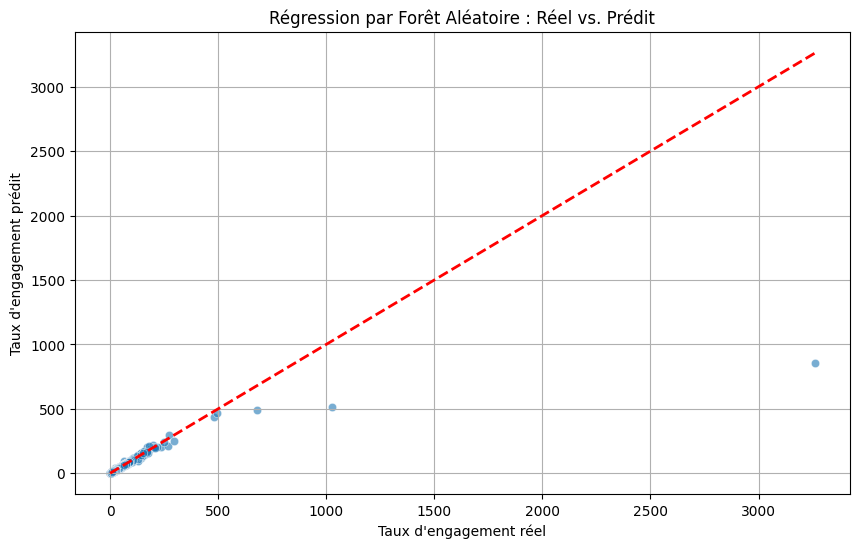

Scatter plot of actual vs. predicted values for Random Forest Regression displayed.


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Taux d'engagement réel")
plt.ylabel("Taux d'engagement prédit")
plt.title("Régression par Forêt Aléatoire : Réel vs. Prédit")
plt.grid(True)
plt.show()
print("Scatter plot of actual vs. predicted values for Random Forest Regression displayed.")

## Régression par Machines à Vecteurs de Support (SVR)

### Subtask:
Appliquer une mise à l'échelle des caractéristiques (feature scaling), puis entraîner un modèle de Régression par Machines à Vecteurs de Support (SVR). Évaluer ses performances et visualiser les valeurs réelles par rapport aux valeurs prédites.


**Reasoning**:
The first step is to import the `StandardScaler` class from `sklearn.preprocessing` for feature scaling and the `SVR` class from `sklearn.svm` for Support Vector Regression, as specified in the instructions.



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
print("StandardScaler and SVR imported.")

StandardScaler and SVR imported.


**Reasoning**:
The next step is to initialize a `StandardScaler` object and apply it to scale the training and test sets, storing the results in `X_train_scaled` and `X_test_scaled`, as specified in the instructions.



In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled for training and test sets.")

Features scaled for training and test sets.


**Reasoning**:
The next step is to initialize an SVR model with an 'rbf' kernel and train it using the scaled training data (`X_train_scaled` and `y_train`), as specified in the instructions.



In [35]:
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train)
print("SVR model initialized and trained with 'rbf' kernel.")

SVR model initialized and trained with 'rbf' kernel.


**Reasoning**:
The next step is to make predictions on the scaled test set (`X_test_scaled`) using the trained SVR model (`model_svr`), as specified in the instructions, and store the results in `y_pred_svr`.



In [36]:
y_pred_svr = model_svr.predict(X_test_scaled)
print("Predictions on the scaled test set made for SVR.")

Predictions on the scaled test set made for SVR.


**Reasoning**:
Now that predictions have been made with the SVR model, the next step is to calculate the R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate its performance, as specified in the instructions. These metrics will be printed, formatted to two decimal places.



In [37]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Regression - R-squared: {r2_svr:.2f}")
print(f"SVR Regression - MSE: {mse_svr:.2f}")
print(f"SVR Regression - RMSE: {rmse_svr:.2f}")

SVR Regression - R-squared: 0.09
SVR Regression - MSE: 2238.35
SVR Regression - RMSE: 47.31


**Reasoning**:
The final step of the subtask is to visualize the actual values (`y_test`) against the predicted values (`y_pred_svr`) using a scatter plot. This visualization will include a diagonal line representing perfect predictions, along with appropriate titles and axis labels to assess the model's fit, as specified in the instructions.



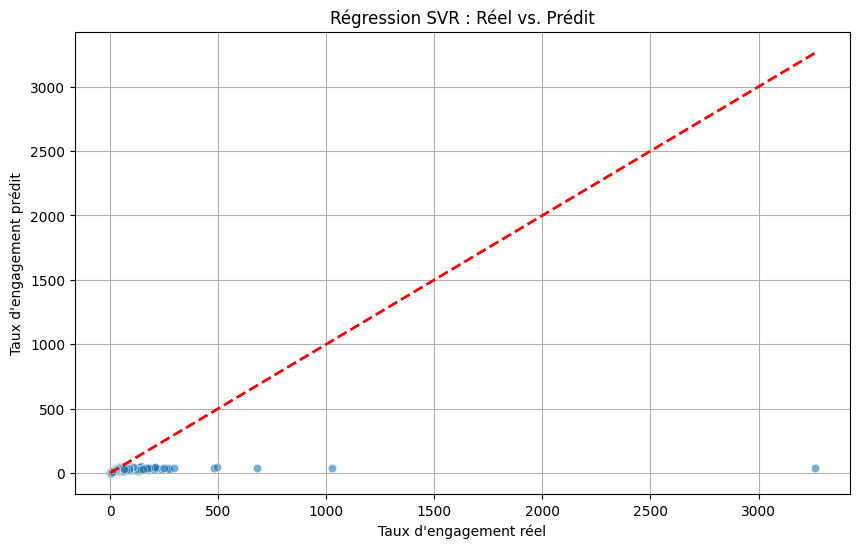

Scatter plot of actual vs. predicted values for SVR displayed.


In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Taux d'engagement réel")
plt.ylabel("Taux d'engagement prédit")
plt.title("Régression SVR : Réel vs. Prédit")
plt.grid(True)
plt.show()
print("Scatter plot of actual vs. predicted values for SVR displayed.")

## Comparaison des Modèles et Visualisation des Résultats

### Subtask:
Comparer les métriques de performance (R-carré, MSE, RMSE) de tous les modèles entraînés. Créer un graphique récapitulatif pour visualiser les performances comparées de chaque type de régression. Inclure des commentaires en français pour chaque modèle et comparaison.


**Reasoning**:
The first step is to collect all the performance metrics (R-squared, MSE, RMSE) for each trained model into a dictionary, as specified in the instructions. This will serve as the raw data for our comparison table and visualizations.



In [39]:
results_df_dict = {
    'Model': ['Régression Linéaire', 'Régression Polynomiale', 'Régression par Arbres de Décision', 'Régression par Forêts Aléatoires', 'SVR'],
    'R-squared': [r2_lr, r2_poly, r2_dt, r2_rf, r2_svr],
    'MSE': [mse_lr, mse_poly, mse_dt, mse_rf, mse_svr],
    'RMSE': [rmse_lr, rmse_poly, rmse_dt, rmse_rf, rmse_svr]
}
print("Dictionary of model performance metrics created.")

Dictionary of model performance metrics created.


**Reasoning**:
The next step is to convert the `results_df_dict` dictionary into a Pandas DataFrame named `results_df`, as specified in the instructions. This will allow for easier tabular display and manipulation of the performance metrics.



In [40]:
results_df = pd.DataFrame(results_df_dict)
print("Performance metrics converted to DataFrame.")

Performance metrics converted to DataFrame.


**Reasoning**:
The next step is to display the `results_df` DataFrame to show a tabular comparison of the performance metrics for each model, as specified in the instructions.



In [41]:
print("Comparaison des performances des modèles de régression :")
print(results_df)

Comparaison des performances des modèles de régression :
                               Model  R-squared          MSE       RMSE
0                Régression Linéaire   0.094114  2238.517330  47.312972
1             Régression Polynomiale   0.165559  2061.971273  45.408934
2  Régression par Arbres de Décision   0.713425   708.150675  26.611101
3   Régression par Forêts Aléatoires   0.589463  1014.470281  31.850750
4                                SVR   0.094181  2238.352310  47.311228


**Reasoning**:
The next step is to create a figure with two subplots and generate bar charts for R-squared and RMSE values for each model, as specified in the instructions. This will provide a visual comparison of the models' performance.



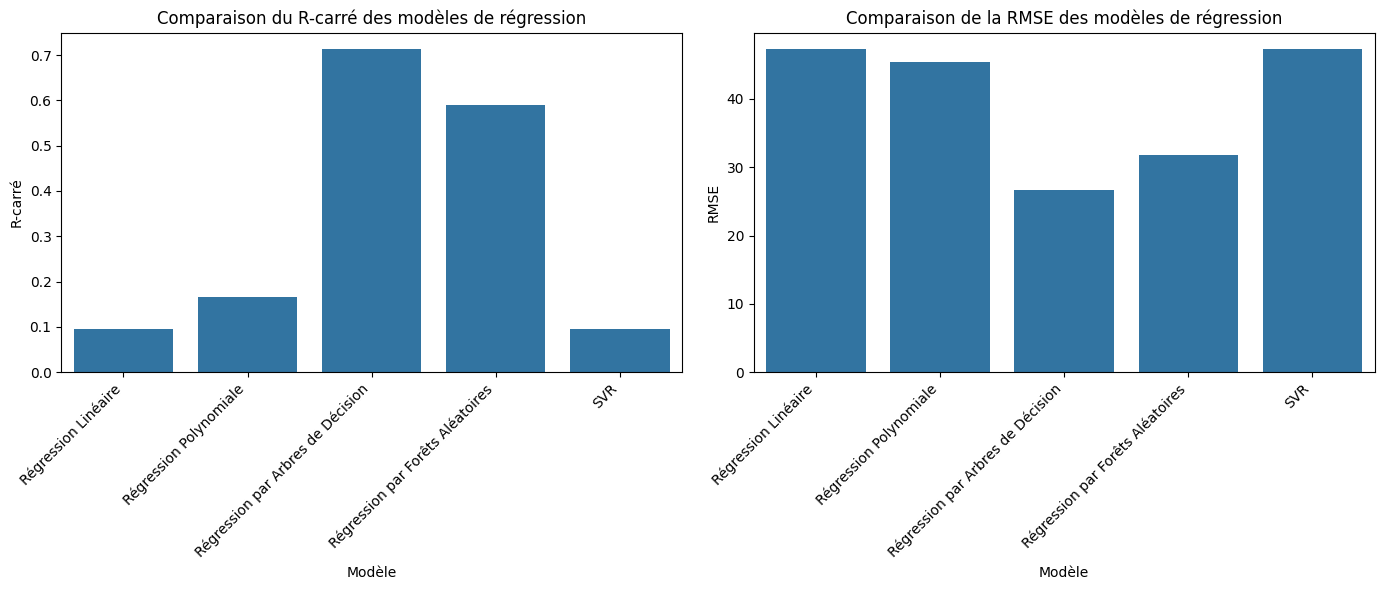

Bar charts comparing R-squared and RMSE for each model displayed.


In [42]:
plt.figure(figsize=(14, 6))

# Subplot 1: R-squared comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('Comparaison du R-carré des modèles de régression')
plt.ylabel('R-carré')
plt.xlabel('Modèle')
plt.xticks(rotation=45, ha='right')

# Subplot 2: RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Comparaison de la RMSE des modèles de régression')
plt.ylabel('RMSE')
plt.xlabel('Modèle')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
print("Bar charts comparing R-squared and RMSE for each model displayed.")

## Final Task

### Subtask:
Fournir un résumé des découvertes de l'analyse prédictive, identifier le ou les meilleurs modèles pour prédire le taux d'engagement et discuter des implications des résultats.


## Summary:

### Q&A

**Quel(s) est/sont le/les meilleur(s) modèle(s) pour prédire le taux d'engagement ?**
Le modèle de **Régression par Arbres de Décision** est le meilleur pour prédire le taux d'engagement, avec le R-carré le plus élevé (0.71) et le RMSE le plus bas (26.61).

### Data Analysis Key Findings

*   **Préparation des données réussie** : Les caractéristiques temporelles (mois, jour de la semaine, heure, année d'upload) ont été extraites avec succès de la colonne `upload_date`. Les variables catégorielles (`media_type`, `traffic_source`, `content_category`) ont été encodées en utilisant l'approche One-Hot. Le jeu de données résultant est exempt de valeurs manquantes et prêt pour la modélisation.
*   **Division des données** : Le jeu de données a été correctement divisé en ensembles d'entraînement et de test, avec 80% des données allouées à l'entraînement et 20% au test.
*   **Performance des modèles de régression comparée** :
    *   La **Régression Linéaire** et le **SVR** ont montré des performances très faibles, avec un R-carré d'environ 0.09 et un RMSE d'environ 47.31, ce qui indique qu'ils expliquent moins de 10% de la variance du taux d'engagement.
    *   La **Régression Polynomiale** a légèrement amélioré les performances par rapport à la régression linéaire, atteignant un R-carré de 0.17 et un RMSE de 45.41.
    *   La **Régression par Forêts Aléatoires** a obtenu un R-carré de 0.59 et un RMSE de 31.85, montrant une capacité prédictive modérée.
    *   La **Régression par Arbres de Décision** a surpassé tous les autres modèles de manière significative, atteignant un R-carré de **0.71** et le RMSE le plus bas de **26.61**.

### Insights or Next Steps

*   Le modèle de Régression par Arbres de Décision est le plus performant pour prédire le taux d'engagement. Il pourrait être intéressant d'analyser les caractéristiques les plus importantes de ce modèle pour comprendre quels facteurs influencent le plus le taux d'engagement.
*   Pour améliorer davantage les performances, une optimisation des hyperparamètres (par exemple, profondeur maximale de l'arbre, nombre minimal d'échantillons par feuille) pourrait être effectuée sur le modèle de Régression par Arbres de Décision, ainsi que sur la Forêt Aléatoire qui a également montré un bon potentiel.
